In [53]:
# Import all library's
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import tensorflow as tf
import altair as alt
import plotly.graph_objects as go
import plotly.express as px
import missingno as msno

from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from pandas.api.types import is_numeric_dtype
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

from sklearn.inspection import permutation_importance

In [27]:
# Data Loading
all_data = pd.read_csv("ispu_dki_all.csv")
all_data.head(10)

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2010-01-01,DKI1 (Bunderan HI),60.0,NaN,4.0,73.0,27.0,14.0,73.0,CO,SEDANG
1,2010-01-02,DKI1 (Bunderan HI),32.0,NaN,2.0,16.0,33.0,9.0,33.0,O3,BAIK
2,2010-01-03,DKI1 (Bunderan HI),27.0,NaN,2.0,19.0,20.0,9.0,27.0,PM10,BAIK
3,2010-01-04,DKI1 (Bunderan HI),22.0,NaN,2.0,16.0,15.0,6.0,22.0,PM10,BAIK
4,2010-01-05,DKI1 (Bunderan HI),25.0,NaN,2.0,17.0,15.0,8.0,25.0,PM10,BAIK
5,2010-01-06,DKI1 (Bunderan HI),30.0,NaN,3.0,22.0,19.0,11.0,30.0,PM10,BAIK
6,2010-01-07,DKI1 (Bunderan HI),41.0,NaN,4.0,24.0,27.0,13.0,41.0,PM10,BAIK
7,2010-01-08,DKI1 (Bunderan HI),64.0,NaN,8.0,51.0,19.0,15.0,64.0,PM10,SEDANG
8,2010-01-09,DKI1 (Bunderan HI),55.0,NaN,5.0,39.0,23.0,16.0,55.0,PM10,SEDANG
9,2010-01-10,DKI1 (Bunderan HI),34.0,NaN,5.0,23.0,26.0,12.0,34.0,PM10,BAIK



Jakarta Highest AQI Data Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4626 entries, 0 to 4625
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   4626 non-null   object 
 1   stasiun   4626 non-null   object 
 2   pm10      4466 non-null   float64
 3   pm25      723 non-null    float64
 4   so2       4607 non-null   float64
 5   co        4618 non-null   float64
 6   o3        4621 non-null   float64
 7   no2       4618 non-null   float64
 8   max       4626 non-null   float64
 9   critical  4625 non-null   object 
 10  categori  4626 non-null   object 
dtypes: float64(7), object(4)
memory usage: 397.7+ KB
None

Missing Value Report:
tanggal        0
stasiun        0
pm10         160
pm25        3903
so2           19
co             8
o3             5
no2            8
max            0
critical       1
categori       0
dtype: int64


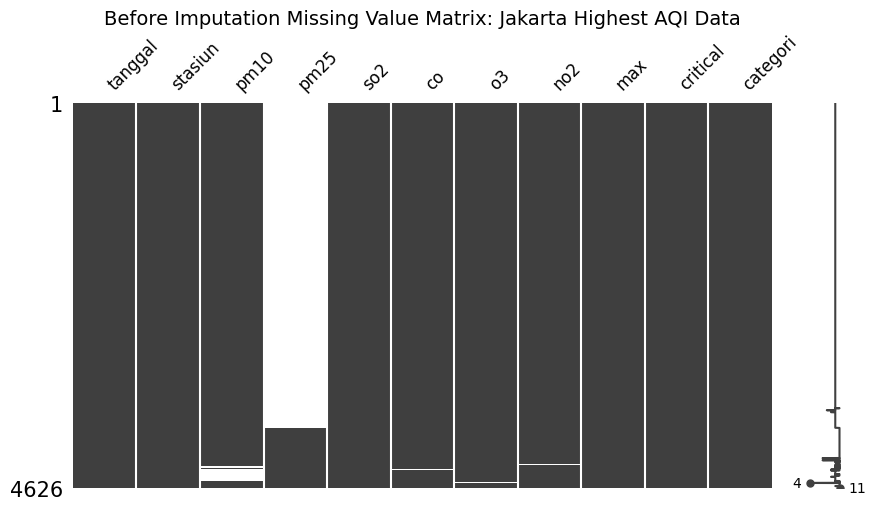

In [28]:
# Data Preprocessing - Missing Values (before imputation)
datasets = {
    "Jakarta Highest AQI Data": all_data
}

for name, data in datasets.items():
    print(f"\n{name} Dataset:")
    print(data.info())
    print("\nMissing Value Report:")
    print(data.isnull().sum())

    msno.matrix(data, figsize=(10, 5), fontsize=12)
    plt.title(f"Before Imputation Missing Value Matrix: {name}", fontsize=14)
    plt.show()

In [29]:
# Preprocessing Data - Data Cleansing on dataframe all_data
all_data.drop(columns=['pm25'], inplace=True)

numerical_columns = all_data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    all_data[col] = all_data[col].fillna(all_data[col].mean())

categorical_columns = all_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

print(all_data.isnull().sum())

tanggal     0
stasiun     0
pm10        0
so2         0
co          0
o3          0
no2         0
max         0
critical    0
categori    0
dtype: int64



Jakarta Highest AQI Data Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4626 entries, 0 to 4625
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   4626 non-null   object 
 1   stasiun   4626 non-null   object 
 2   pm10      4626 non-null   float64
 3   so2       4626 non-null   float64
 4   co        4626 non-null   float64
 5   o3        4626 non-null   float64
 6   no2       4626 non-null   float64
 7   max       4626 non-null   float64
 8   critical  4626 non-null   object 
 9   categori  4626 non-null   object 
dtypes: float64(6), object(4)
memory usage: 361.5+ KB
None

Missing Value Report:
tanggal     0
stasiun     0
pm10        0
so2         0
co          0
o3          0
no2         0
max         0
critical    0
categori    0
dtype: int64


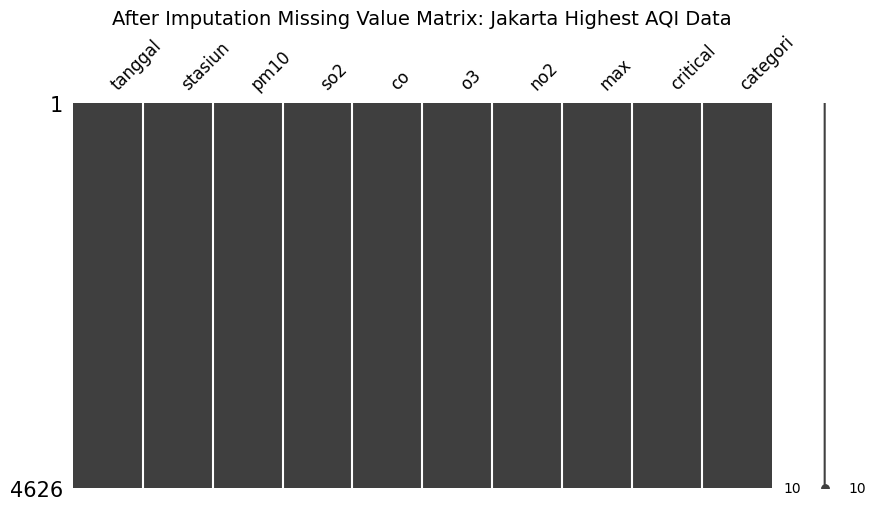

In [30]:
# Preprocessing Data - Missing Value (after imputation and dropping)
datasets = {
    "Jakarta Highest AQI Data": all_data
}

for name, data in datasets.items():
    print(f"\n{name} Dataset:")
    print(data.info())
    print("\nMissing Value Report:")
    print(data.isnull().sum())

    msno.matrix(data, figsize=(10, 5), fontsize=12)
    plt.title(f"After Imputation Missing Value Matrix: {name}", fontsize=14)
    plt.show()

In [31]:
# Adding attributes for daily pollutant average and weekend/weekday indicator

all_data['rata_rata_polutan'] = all_data[['pm10', 'so2', 'co', 'o3', 'no2']].mean(axis=1)
all_data['tanggal'] = pd.to_datetime(all_data['tanggal'])
all_data['weekday_weekend'] = all_data['tanggal'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')


In [32]:
# Convert datetime and remove 'date' column

all_data['year'] = pd.to_datetime(all_data['tanggal']).dt.year
all_data['month'] = pd.to_datetime(all_data['tanggal']).dt.month
all_data['day'] = pd.to_datetime(all_data['tanggal']).dt.day
all_data.drop(columns=['tanggal'], inplace=True)

In [33]:
all_data.head(5)

,stasiun,pm10,so2,co,o3,no2,max,critical,categori,rata_rata_polutan,weekday_weekend,year,month,day
0,DKI1 (Bunderan HI),60.0,4.0,73.0,27.0,14.0,73.0,CO,SEDANG,35.6,Weekday,2010,1,1
1,DKI1 (Bunderan HI),32.0,2.0,16.0,33.0,9.0,33.0,O3,BAIK,18.4,Weekend,2010,1,2
2,DKI1 (Bunderan HI),27.0,2.0,19.0,20.0,9.0,27.0,PM10,BAIK,15.4,Weekend,2010,1,3
3,DKI1 (Bunderan HI),22.0,2.0,16.0,15.0,6.0,22.0,PM10,BAIK,12.2,Weekday,2010,1,4
4,DKI1 (Bunderan HI),25.0,2.0,17.0,15.0,8.0,25.0,PM10,BAIK,13.4,Weekday,2010,1,5


In [34]:
numerical_cols = ['pm10', 'so2', 'co', 'o3', 'no2', 'rata_rata_polutan']

In [35]:
# Visualization of Numeric Column Distribution
alt.Chart(all_data).transform_fold(
    numerical_cols,
    as_=['Variable', 'Value']
).mark_area(
    opacity=0.5
).encode(
    alt.X('Value:Q', bin=alt.Bin(maxbins=30)),
    alt.Y('count()'),
    alt.Color('Variable:N')
).properties(
    title='Distribution of Numerical Columns',
    width=600,
    height=400
).interactive()

alt.Chart(...)

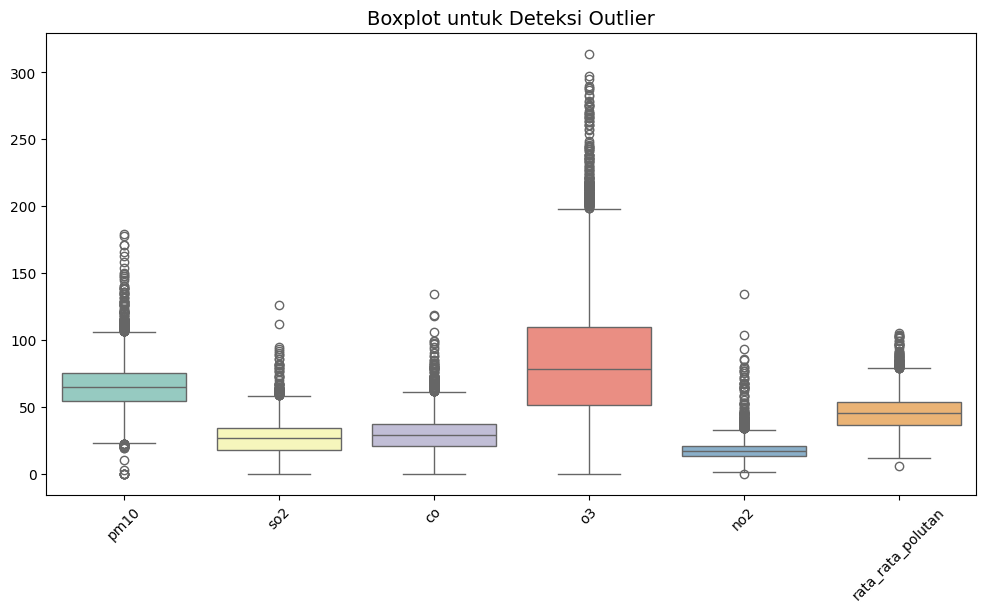

In [36]:
# Visualisasi Outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=all_data[numerical_cols], palette='Set3')
plt.title('Boxplot untuk Deteksi Outlier', fontsize=14)
plt.xticks(rotation=45)
plt.show()

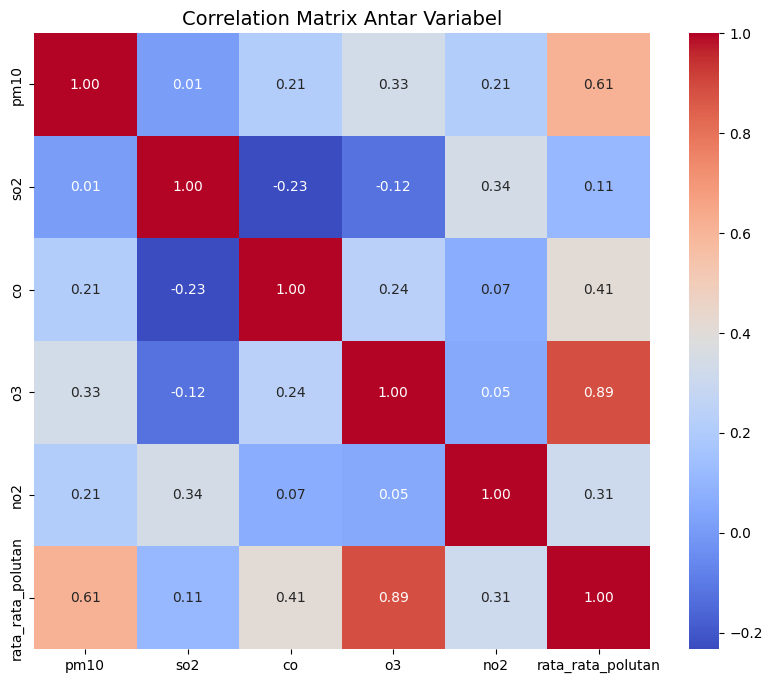

In [37]:
# Visualization of Correlation Heatmap Between Variables

plt.figure(figsize=(10, 8))
corr_matrix = all_data[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix Antar Variabel', fontsize=14)
plt.show()


In [38]:
# Visualization of Correlation Heatmap Between Variables
temp_df = all_data
temp_df['datetime'] = pd.to_datetime(all_data[['year', 'month', 'day']])

alt.Chart(temp_df).mark_line().encode(
    x=alt.X('datetime:T', title='Waktu'),
    y=alt.Y('rata_rata_polutan:Q', title='Rata-rata Polutan'),
    tooltip=['datetime:T', 'average_pollutant:Q']
).properties(
    title='Rata-rata Polutan dari Waktu ke Waktu',
    width=800,
    height=400
).interactive()

alt.Chart(...)

In [39]:
# Visualization of Categories Over Time

data_categori = all_data.groupby(['year', 'month', 'categori']).size().reset_index(name='count')

chart = alt.Chart(data_categori).mark_bar().encode(
    x=alt.X('month:O', title='Month'), 
    y=alt.Y('count:Q', title='Count'),
    color='categori:N',  
    column='year:O',  
).properties(
    title='Distribusi Kategori Kualitas Udara Jakarta dari Waktu ke Waktu'
)

chart.show()

alt.Chart(...)

In [40]:
# Checking for duplicate data
print("Before checking for duplicates: ", all_data.shape)
all_data = all_data[~all_data.duplicated(keep='last')]
print("After checking for duplicates: ", all_data.shape)

Before checking for duplicates:  (4626, 15)
After checking for duplicates:  (4626, 15)


In [41]:
# Cleaning Data Outliers Using IQR

cols = ['pm10', 'so2', 'co', 'o3', 'no2', 'rata_rata_polutan']

def remove_outlier(df_in, cols):
    df_out = df_in.copy()
    for col_name in cols:
        if is_numeric_dtype(df_out[col_name]):  # Cek apakah kolom numerik
            q1 = df_out[col_name].quantile(0.25)
            q3 = df_out[col_name].quantile(0.75)
            iqr = q3 - q1
            upper_bound = q3 + (iqr * 1.5)
            lower_bound = q1 - (iqr * 1.5)

            # Hapus baris yang berada di luar batas IQR untuk kolom tersebut
            df_out = df_out[(df_out[col_name] >= lower_bound) & (df_out[col_name] <= upper_bound)]
    return df_out

# Call cleaning function
all_data_cleaned = remove_outlier(all_data, cols)

# check result
print("Number of rows before removing outliers: ", all_data.shape[0])
print("Number of rows after removing outliers: ", all_data_cleaned.shape[0])

Number of rows before removing outliers:  4626
Number of rows after removing outliers:  3957


In [42]:
# Label Encoding for Non-Numeric Data
label_encoder = LabelEncoder()
all_data_cleaned['stasiun'] = label_encoder.fit_transform(all_data_cleaned['stasiun'])
all_data_cleaned['critical'] = label_encoder.fit_transform(all_data_cleaned['critical'])
all_data_cleaned['weekday_weekend'] = label_encoder.fit_transform(all_data_cleaned['weekday_weekend'])
all_data_cleaned['categori'] = label_encoder.fit_transform(all_data_cleaned['categori'])
all_data_cleaned.drop(columns=['datetime'], inplace=True)

In [45]:
# Feature Scaling & Train-test split

x = all_data_cleaned.drop(['categori', 'stasiun'], axis = 1).values
y = all_data_cleaned.categori.values

# Data Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.25, random_state=15)

smote = SMOTE(random_state=42, k_neighbors=1)
x_train, y_train = smote.fit_resample(x_train, y_train)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7148, 12)
(990, 12)
(7148,)
(990,)


In [51]:
# Random Forest Modeling
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(x_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(x_test)

print("BUILDING MODEL....")
print(classification_report(y_test, y_pred_rf, zero_division=0))  
print("FEATURE IMPORTANCES:", rf_model.feature_importances_)

BUILDING MODEL....
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           2       1.00      1.00      1.00       580
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00       334

    accuracy                           1.00       990
   macro avg       0.75      0.75      0.75       990
weighted avg       1.00      1.00      1.00       990

FEATURE IMPORTANCES: [1.16455349e-01 1.51075378e-02 1.37426114e-02 1.75803448e-01
 2.54673810e-02 3.66059201e-01 4.28903992e-02 1.09630434e-01
 1.95021271e-04 9.16051173e-02 1.33791359e-02 2.96643645e-02]


In [54]:
# Suport Vector Machine Model
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# Model Training
svm_model.fit(x_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(x_test)
y_pred_svm_proba = svm_model.predict_proba(x_test)

print("Building Model SVM...")
print(classification_report(y_test, y_pred_rf, zero_division=0))
perm_importance = permutation_importance(svm_model, x_test, y_test, n_repeats=10, random_state=42)
print("FEATURE IMPORTANCES (Permutation):", perm_importance.importances_mean)

Building Model SVM...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           2       1.00      1.00      1.00       580
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00       334

    accuracy                           1.00       990
   macro avg       0.75      0.75      0.75       990
weighted avg       1.00      1.00      1.00       990

FEATURE IMPORTANCES (Permutation): [ 3.16161616e-02  1.56565657e-02  6.66666667e-03  7.32323232e-02
 -3.83838384e-03  3.04343434e-01  2.52525253e-02  4.78787879e-02
  1.71717172e-03  2.27272727e-02 -7.07070707e-04 -2.02020202e-04]


In [56]:
# Multi-layer Perceptron Classifier Model

mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=300, random_state=42)
mlp_model.fit(x_train, y_train)

# Predictions
y_pred_mlp = mlp_model.predict(x_test)

print("Building Model MLP...")
perm_importance = permutation_importance(mlp_model, x_test, y_test, n_repeats=10, random_state=42)
print("Feature Importances (Permutation):", perm_importance.importances_mean)

Building Model MLP...
Feature Importances (Permutation): [5.11111111e-02 1.83838384e-02 8.48484848e-03 8.55555556e-02
 4.64646465e-03 3.70909091e-01 3.95959596e-02 4.36363636e-02
 2.12121212e-03 2.32323232e-03 1.11111111e-03 2.02020202e-04]


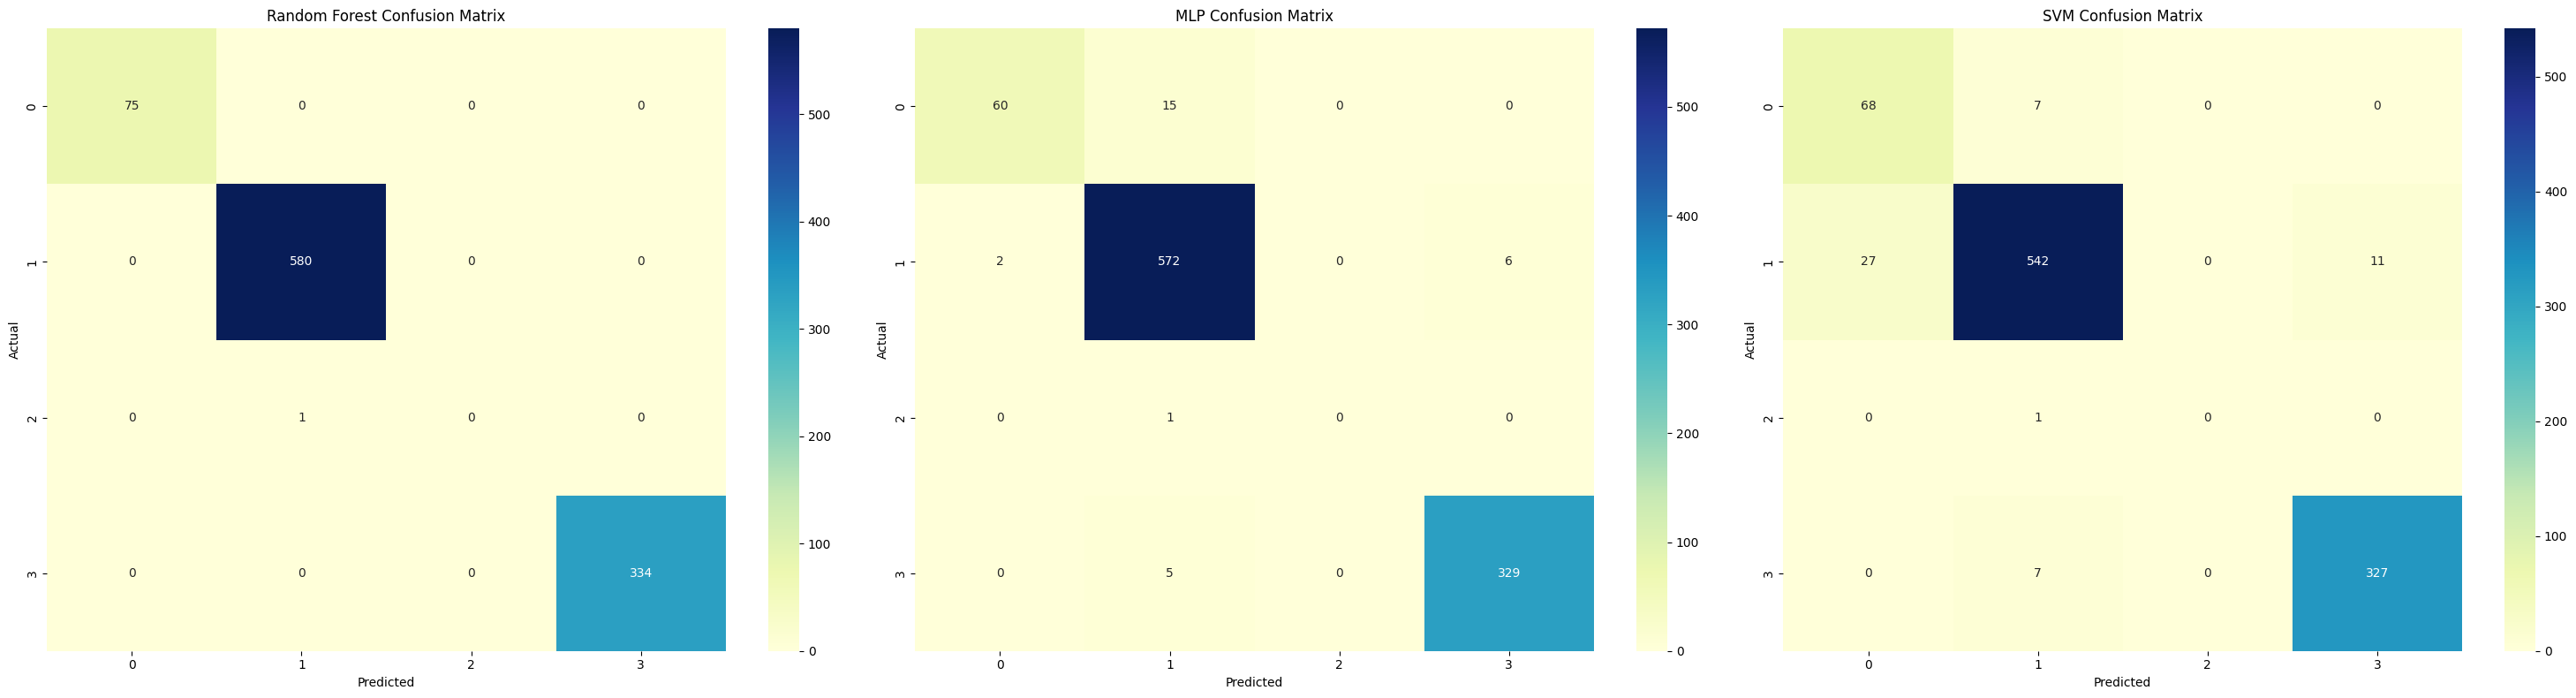

In [57]:
# Evaluation of 3 Classification Models - Confusion Matrix

model_names = ['Random Forest', 'MLP', 'SVM']
conf_matrices = [
    confusion_matrix(y_test, y_pred_rf),
    confusion_matrix(y_test, y_pred_mlp),
    confusion_matrix(y_test, y_pred_svm)
]

fig, axes = plt.subplots(1, 3, figsize=(30, 8))
for i, (model_name, conf_matrix) in enumerate(zip(model_names, conf_matrices)):
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", ax=axes[i])
    axes[i].set_title(f'{model_name} Confusion Matrix')
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
plt.tight_layout()
plt.show()